In [ ]:
# function to detect hair regions in the image
def sobel_operator(image):
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # sobel operator for horizontal and vertical edges
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

    gradient_magnitude = np.abs(sobel_x) + np.abs(sobel_y)    # approximate the magnitude as a sum
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX) # normalize to bring to 8-bit range for representation

    _, sharp_regions = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)  # perform binary thresolding
    sharp_regions = np.uint8(sharp_regions)
    sharp_regions = cv2.GaussianBlur(sharp_regions, (7, 7), 0)  # blurring for noise reduction
    return sharp_regions

# function to apply power-law transformation
def gamma_correction(image, gamma):
    img_array = np.array(image)
    corrected_img_array = np.power(img_array / 255.0, gamma) * 255.0
    return corrected_img_array

(-0.5, 1439.5, 1079.5, -0.5)

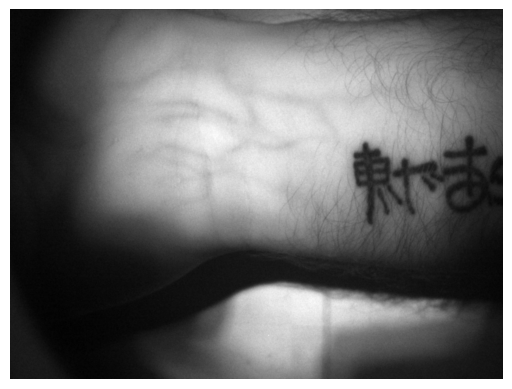

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# read the grayscale image
image = cv2.imread('/content/left0.png', cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(image, (5,5), 0)

plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

Total time taken for mask generation: 0.03523612022399902


(-0.5, 1439.5, 1079.5, -0.5)

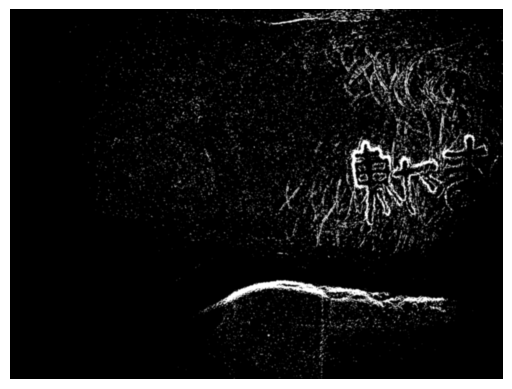

In [ ]:
begin = time.time()
new_img = sobel_operator(blurred_image)
end = time.time()

total_time = end - begin
print(f"Total time taken for mask generation: {total_time}")
# new_img = apply_erosion_and_dilation(new_img)

plt.imshow(new_img, cmap='gray')
plt.axis('off')

In [ ]:
begin = time.time()
result = cv2.inpaint(blurred_image, new_img, inpaintRadius=2, flags=cv2.INPAINT_TELEA)
end = time.time()

total_time += (end - begin)
gamma_value = 1.2

begin = time.time()
corrected_image = gamma_correction(result, gamma_value)
end = time.time()

total_time += (end - begin)

print(f"Total time taken: {total_time}")

Total time taken: 6.599488735198975


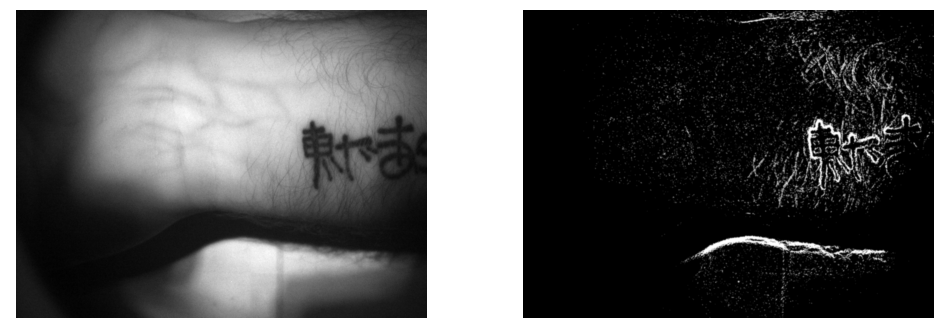

In [ ]:
# plot the results
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.imshow(blurred_image, cmap='gray')
#plt.title('Original')
plt.axis('equal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new_img, cmap='gray')
#plt.title('Enhanced')
plt.axis('equal')
plt.axis('off')

# show the plot
plt.show()